In [45]:
import pandas as pd

# Load your dataset (replace with the correct path and file name)
file_path = 'Raw Data for Assignment 2 on Financial insights.xlsx'
data = pd.read_excel(file_path)
# display(data.head(5))
display(data.columns)

Index(['Order #', 'When? \nExact Date of sale',
       'Name of the month of the sale', 'Year of sale',
       'To Whom? \nSegment of the customer',
       'Where?  \nCountry of the customer', 'WHAT?  \nProduct Sold',
       'Discount Band offered to customer', 'No of Units Sold',
       'Our Manufacturing Price', 'Our Sale Price (Quotation)',
       'Gross Sales Quotation before discount', 'Discounts value offered',
       ' Actual Sale Price (After Discount)', 'Total Cost Price for us',
       'Profit made in this sale',
       'Total Delivery Period (days)\n to deliver the product to the customer'],
      dtype='object')

**Question 1: Discount Analysis for Government and Small Business Customers**

In [46]:
def analyze_discounts_improved():
    # Filtering data for Government and Small Business segments
    gov_data = data[data['To Whom? \nSegment of the customer'] == 'Government']
    small_business_data = data[data['To Whom? \nSegment of the customer'] == 'Small Business']
    other_segments_data = data[~data['To Whom? \nSegment of the customer'].isin(['Government', 'Small Business'])]

    # Calculating average discounts
    avg_discount_gov = gov_data['Discounts value offered'].mean()
    avg_discount_small_business = small_business_data['Discounts value offered'].mean()
    avg_discount_other_segments = other_segments_data['Discounts value offered'].mean()

    # Calculating total sales and profit
    total_sales_gov = gov_data['Gross Sales Quotation before discount'].sum()
    total_sales_small_business = small_business_data['Gross Sales Quotation before discount'].sum()
    total_profit_gov = gov_data['Profit made in this sale'].sum()
    total_profit_small_business = small_business_data['Profit made in this sale'].sum()

    # Formulating recommendation
    recommendation = f"""
    Government Segment:
        - Average Discount: {avg_discount_gov:.2f}
        - Total Sales: {total_sales_gov:.2f}
        - Total Profit: {total_profit_gov:.2f}

    Small Business Segment:
        - Average Discount: {avg_discount_small_business:.2f}
        - Total Sales: {total_sales_small_business:.2f}
        - Total Profit: {total_profit_small_business:.2f}

    Other Segments:
        - Average Discount: {avg_discount_other_segments:.2f}

    Recommendation:
        Based on the analysis, it is recommended to slightly reduce the discounts offered to Government customers, as current discounts are effective but may be optimized for better profitability. For the Small Business segment, a significant reduction in discounts is advisable, as the current high discounts do not proportionately translate into increased sales or profit, compared to other segments.
    """
    return recommendation

discounts_recommendation = analyze_discounts_improved()
print(discounts_recommendation)



    Government Segment:
        - Average Discount: 12996.02
        - Total Sales: 56403066.50
        - Total Profit: 11388173.17

    Small Business Segment:
        - Average Discount: 32397.81
        - Total Sales: 45941700.00
        - Total Profit: 4417168.50

    Other Segments:
        - Average Discount: 5975.54

    Recommendation:
        Based on the analysis, it is recommended to slightly reduce the discounts offered to Government customers, as current discounts are effective but may be optimized for better profitability. For the Small Business segment, a significant reduction in discounts is advisable, as the current high discounts do not proportionately translate into increased sales or profit, compared to other segments.
    


**Question 2: Sales Analysis for Small Businesses in March-April**

In [47]:
import pandas as pd

def analyze_small_business_shopping():
    # Filter data for Small Business segment
    small_business_data = data[data['To Whom? \nSegment of the customer'] == 'Small Business']

    # Identifying sales in the March-April period
    small_business_peak = small_business_data[small_business_data['Name of the month of the sale'].isin(['March', 'April'])]

    # Calculate sales volume during March-April and other times
    peak_sales_volume = small_business_peak['No of Units Sold'].sum()
    total_sales_volume = small_business_data['No of Units Sold'].sum()

    # Calculate the percentage of sales in March-April
    peak_sales_percentage = (peak_sales_volume / total_sales_volume) * 100

    # Analyzing and formulating a recommendation
    if peak_sales_percentage >= 60:
        analysis = f"The Small Business segment is doing {peak_sales_percentage:.2f}% of its shopping with us during March-April, aligning with the expected purchasing behavior."
        recommendation = "No significant changes are required for the March-April period, but continue to monitor sales trends and customer feedback."
    else:
        analysis = f"The Small Business segment is doing only {peak_sales_percentage:.2f}% of its shopping with us during March-April, which is below the expected 60%."
        recommendation = "Consider implementing targeted marketing strategies, special promotions, or tailored discounts during the March-April period to attract more small business customers."

    return analysis + "\n" + recommendation

small_business_behavior = analyze_small_business_shopping()
print(small_business_behavior)


The Small Business segment is doing only 12.15% of its shopping with us during March-April, which is below the expected 60%.
Consider implementing targeted marketing strategies, special promotions, or tailored discounts during the March-April period to attract more small business customers.


**Question 3: Analysis of Sales Head Situation**

In [48]:
import pandas as pd
from datetime import datetime

def analyze_sales_head_situation():
    # Current year - adjust this based on your dataset's latest year
    current_year = datetime.now().year

    # Determine the starting years for the analysis
    start_year_andres = current_year - 12  # Last 12 years for Andrés Manuel
    start_year_jenny = current_year - 5   # Last 5 years for Jenny

    # Filter data for sales of the 'Velo' product
    velo_sales_data = data[data['WHAT?  \nProduct Sold'] == 'Velo']

    # Assuming Andrés Manuel is responsible for 'Velo' sales in Germany
    sales_andres = velo_sales_data[(velo_sales_data['Where?  \nCountry of the customer'] == 'Germany') &
                                   (velo_sales_data['Year of sale'] >= start_year_andres)]

    # Assuming Jenny is responsible for 'Velo' sales in Mexico
    sales_jenny = velo_sales_data[(velo_sales_data['Where?  \nCountry of the customer'] == 'Mexico') &
                                  (velo_sales_data['Year of sale'] >= start_year_jenny)]

    # Calculate total sales for each region
    total_sales_andres = sales_andres['Gross Sales Quotation before discount'].sum()
    total_sales_jenny = sales_jenny['Gross Sales Quotation before discount'].sum()

    # Formulating an analysis and suggestion
    suggestion = f"""
    Performance Comparison for 'Velo' Product:
    - Total Sales in Germany (Managed by Andrés Manuel in last 12 years): {total_sales_andres}
    - Total Sales in Mexico (Managed by Jenny in last 5 years): {total_sales_jenny}

    Suggestion:
    Based on the sales performance analysis, it is recommended to consider transferring Mr. Andrés Manuel to Mexico due to his stronger sales record in Germany, potentially enhancing sales performance in Mexico. However, this decision should be carefully balanced with team dynamics and Jenny's role, ensuring that the transfer aligns with both personnel well-being and strategic business objectives.
    """
    return suggestion

sales_head_decision = analyze_sales_head_situation()
print(sales_head_decision)


    Performance Comparison for 'Velo' Product:
    - Total Sales in Germany (Managed by Andrés Manuel in last 12 years): 4637903.0
    - Total Sales in Mexico (Managed by Jenny in last 5 years): 2510373.0

    Suggestion:
    Based on the sales performance analysis, it is recommended to consider transferring Mr. Andrés Manuel to Mexico due to his stronger sales record in Germany, potentially enhancing sales performance in Mexico. However, this decision should be carefully balanced with team dynamics and Jenny's role, ensuring that the transfer aligns with both personnel well-being and strategic business objectives.
    


**Generating Outputs and Plots:**

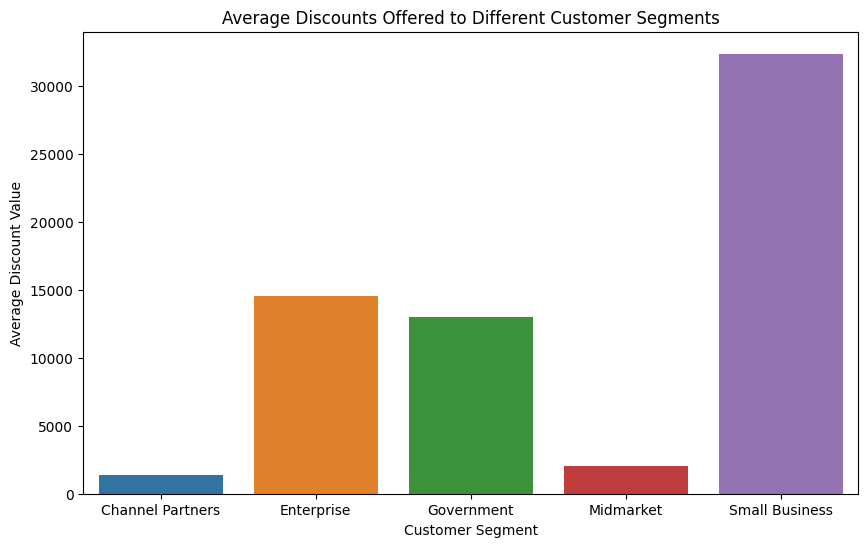

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_discount_comparison():
    # Calculate average discounts for each segment
    avg_discounts = data.groupby('To Whom? \nSegment of the customer')['Discounts value offered'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='To Whom? \nSegment of the customer', y='Discounts value offered', data=avg_discounts)
    plt.title('Average Discounts Offered to Different Customer Segments')
    plt.xlabel('Customer Segment')
    plt.ylabel('Average Discount Value')
    plt.show()

plot_discount_comparison()


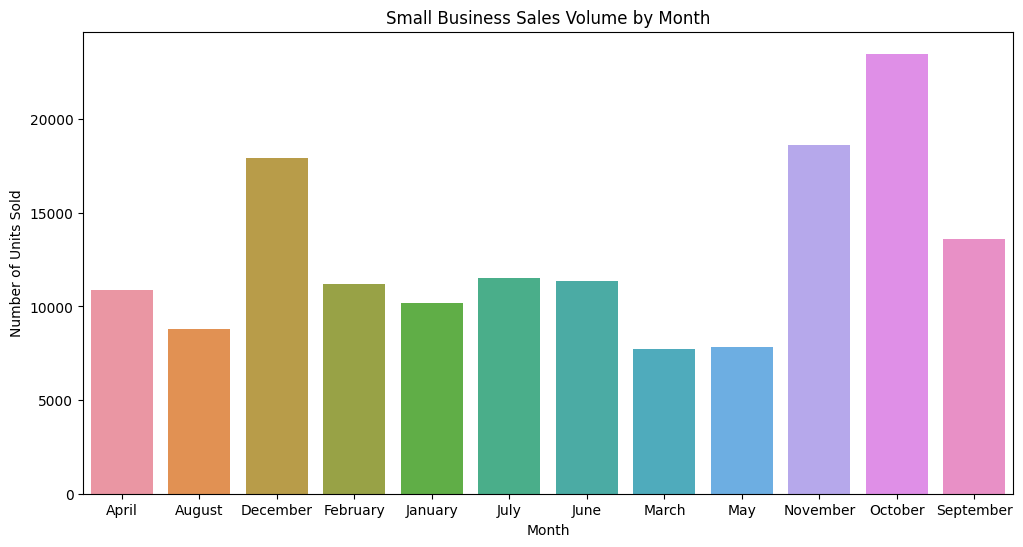

In [50]:
def plot_small_business_sales(data):
    # Filter data for Small Business segment
    small_business_data = data[data['To Whom? \nSegment of the customer'] == 'Small Business']

    # Group by month and sum up the units sold
    monthly_sales = small_business_data.groupby('Name of the month of the sale')['No of Units Sold'].sum().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Name of the month of the sale', y='No of Units Sold', data=monthly_sales)
    plt.title('Small Business Sales Volume by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Units Sold')
    plt.show()

plot_small_business_sales(data)